## 七月在线机器学习实训营四期第二周(Pandas数据处理)考试-参考答案
#### 参考答案说明:

- 来源：来自于网络搜索，笔记整理，当期及往期优秀同学试卷等途径
- 使用：该答案仅供参考，非唯一固定答案

<center><h1>####答卷开始####</h1></center>
***

### Pandas操作题(共七个步骤，每个步骤要求及分数均已标明。总分100分)

#### 1.数据导入并展示, 文件位置位于0.Teacher/data/下
   - 请将文件student-info.csv中的内容读入pandas DataFrame "df_info"，注意该文件的分隔符是分号，并展示前五行（7.5分）   
   - 请将文件student-score.csv中的内容读入pandas DataFrame "df_score"，注意该文件的分隔符是分号，并展示前五行（7.5分）

In [1]:
import pandas as pd
import numpy as np

In [9]:
df_info=pd.read_csv('student-info.csv',delimiter=';')
df_score=pd.read_csv('student-score.csv',delimiter=';')

df_info.head()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,yes,no,no,4,3,4,1,1,3,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,yes,yes,no,5,3,3,1,1,3,4
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,yes,yes,no,4,3,2,2,3,3,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,yes,3,2,2,1,1,5,2
4,4,GP,F,16,U,GT3,T,3,3,other,...,yes,no,no,4,3,2,1,2,5,4


In [10]:
df_score.head()

,ID,G1,G2,G3
0,0,5,6,6
1,1,5,5,6
2,2,7,8,10
3,3,15,14,15
4,4,6,10,10


#### 2.把两个DataFrame "df_info" 和 "df_score" 按照学生ID对齐拼接起来，结果存在一个新DataFrame "df" 中 (10分）

In [16]:
df = pd.merge(df_info, df_score, on="ID", how="inner")
df.head()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


#### 3.把"df"所有的列展示出来(5分)

In [17]:
df.columns

Index(['ID', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#### 4.统计男生的平均分和女生的平均分(G1, G2, G3)，使用groupby和aggregate来操作(10分)

In [19]:
result=df.groupby('sex').agg({'G1':np.mean,'G2':np.mean,'G3':np.mean})
result

,G3,G2,G1
sex,,,
F,9.966346,10.389423,10.620192
M,10.914439,11.074866,11.229947


#### 5.统计不同年龄的学生(G1, G2, G3)的平均分，并作出柱状图展示（10分）

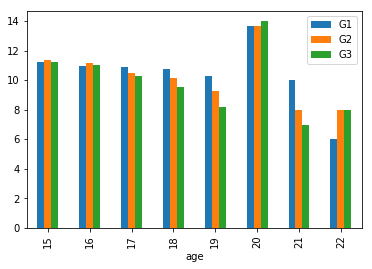

In [24]:
%matplotlib inline
result2=df.groupby('age')['G1','G2','G3'].agg(np.mean)
result2.plot(kind='bar')

#### 6.统计不同学校(school一列)的学生的平均分，并作柱状图展示，要求同一科目的两个学校成绩贴在一起展示(10分）

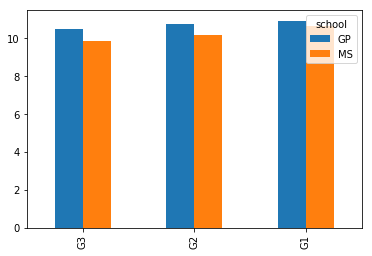

In [25]:
result2=df.groupby('school').agg({'G1':np.mean,'G2':np.mean,'G3':np.mean})
result2.T.plot(kind='bar')

#### 7.统计一下每个学校三个科目总分的前十名，然后把前十名的同学所有信息输出(40分)

In [26]:
def top10(item):
    return item.loc[item['total'].nlargest(10).index]
df['total']=df['G1']+df['G2']+df['G3']
df_gp=df.groupby('school').apply(top10)
df_gp

ID school sex  age address famsize Pstatus  Medu  Fedu      Mjob  \
school                                                                          
GP     47    47     GP   M   16       U     GT3       T     4     3    health   
       110  110     GP   M   15       U     LE3       A     4     4   teacher   
       113  113     GP   M   15       U     LE3       T     4     2   teacher   
       42    42     GP   M   15       U     GT3       T     4     4  services   
       286  286     GP   F   18       U     GT3       T     2     2   at_home   
       129  129     GP   M   16       R     GT3       T     4     4   teacher   
       198  198     GP   F   17       U     GT3       T     4     4  services   
       245  245     GP   M   16       U     GT3       T     2     1     other   
       293  293     GP   F   17       R     LE3       T     3     1  services   
       8      8     GP   M   15       U     LE3       A     3     2  services   
MS     374  374     MS   F   18       R     LE3       T     4     4     other   
       359  359     MS   F   18       U     LE3       T     1     1   at_home   
       363  363     MS   F   17       U     LE3       T     4     4   at_home   
       391  391     MS   M   17       U     LE3       T     3     1  services   
       378  378     MS   F   18       U     GT3       T     3     3     other   
       376  376     MS   F   20       U     GT3       T     4     2    health   
       380  380     MS   M   18       U     GT3       T     4     4   teacher   
       351  351     MS   M   17       U     GT3       T     3     3    health   
       360  360     MS   F   18       R     LE3       A     1     4   at_home   
       366  366     MS   M   18       U     LE3       T     4     4   teacher   

            ...  freetime goout Dalc  Walc  health  absences  G1  G2  G3 total  
school      ...                                                                 
GP     47   ...         2     2    1     1       2         4  19  19  20    58  
       110  ...         5     3    1     1       4         6  18  19  19    56  
       113  ...         5     2    1     1       3        10  18  19  19    56  
       42   ...         3     3    1     1       5         2  19  18  18    55  
       286  ...         3     3    1     2       2         5  18  18  19    55  
       129  ...         5     5    2     5       4         8  18  18  18    54  
       198  ...         2     4    2     3       2        24  18  18  18    54  
       245  ...         3     3    1     1       4         6  18  18  18    54  
       293  ...         1     2    1     1       3         6  18  18  18    54  
       8    ...         2     2    1     1       1         0  16  18  19    53  
MS     374  ...         4     4    1     1       1         0  19  18  19    56  
       359  ...         3     2    1     1       4         0  18  16  16    50  
       363  ...         3     4    1     1       1         0  16  15  15    46  
       391  ...         4     5    3     4       2         3  14  16  16    46  
       378  ...         1     3    1     2       1         0  15  15  15    45  
       376  ...         4     3    1     1       3         4  15  14  15    44  
       380  ...         2     4    1     4       2         4  15  14  14    43  
       351  ...         5     4    2     3       3         2  13  13  13    39  
       360  ...         3     4    1     4       5         0  13  13  13    39  
       366  ...         2     2    2     2       5         0  13  13  13    39  

[20 rows x 35 columns]

***
<center><h1>####答卷结束####</h1></center>